In [38]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re

In [2]:
# Loading the Dataset into pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/ML Datasets/IMDB Dataset.csv')

Data Exploration

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [11]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
df.isnull().sum()

,0
review,0
sentiment,0


In [8]:
df.duplicated().sum()

418

Visualization

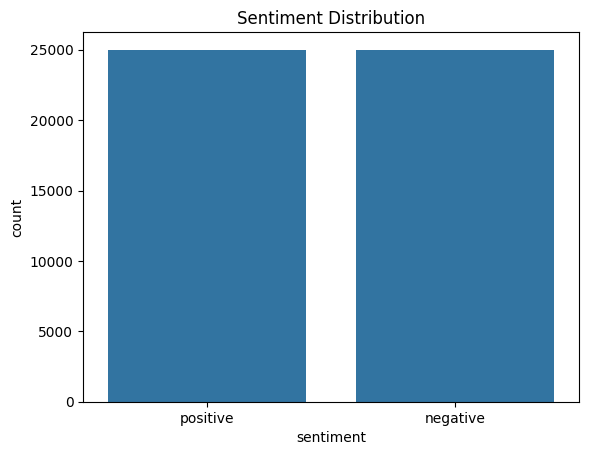

In [10]:
# Distribution of sentiment labels
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

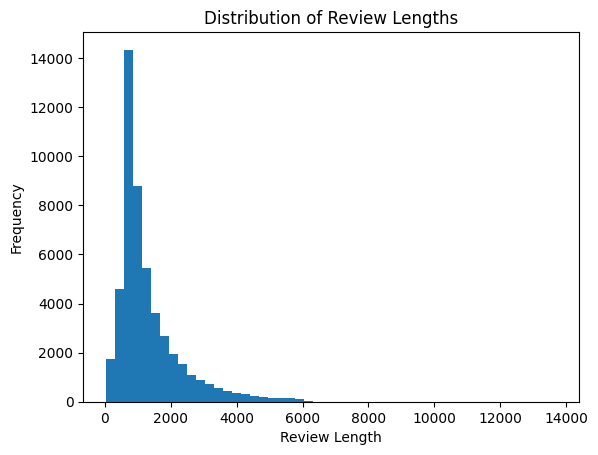

In [12]:
# Add a column for review length
df['review_length'] = df['review'].apply(len)

# Plot the distribution of review lengths
df['review_length'].plot(kind='hist', bins=50, title='Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.show()

Data Cleaning

In [23]:
# Remove duplicate rows
df = df.drop_duplicates()

In [33]:
# Define a function to clean the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function
df['cleaned_review'] = df['review'].apply(clean_text)

Feature Engineering and Feature Selection

In [28]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the cleaned reviews
X = tfidf.fit_transform(df['cleaned_review'])

# Encode the sentiment labels
y = df['sentiment'].map({'positive': 1, 'negative': 0})

Standardization/Normalization

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Train-Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [31]:
# Initialize the Model
model = MultinomialNB()

# Train the Model
model.fit(X_train, y_train)

MultinomialNB()

Model Evaluation

Accuracy: 0.8476
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4939
           1       0.84      0.85      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



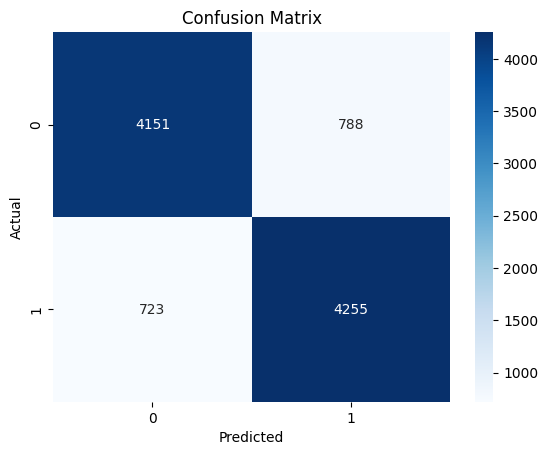

In [35]:
# Make Predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Hyperparameter Tuning with GridSearchCV

In [40]:
# Define hyperparameters to tune
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

# Initialize GridSearchCV
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Test Accuracy with Best Model: {accuracy_best:.4f}')

Best Parameters: {'alpha': 2.0}
Best Cross-Validation Accuracy: 0.8514
Test Accuracy with Best Model: 0.8484
